### Imports

In [23]:

from sklearn import preprocessing

from dataset.dataset import Dataset
from models.neural_net import NeuralNet
from models.sampled_net import SampledNet
from view.visualizer import plot_vector_differences, visualize_data


<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\sampled-networks\\logic.py'>

### Dataset creation

In [24]:
epochs = 200  # Number of training epochs
l = [200]  # Number of neurons in each layer
dataset_file = "boston.csv"

dataset = Dataset()
dataset.load_data_from_csv("datasets_csv/" + dataset_file, 13, 1, skiprows=1)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [25]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)

### Sampled Netwrok training with ridge, and losses comparaison

In [26]:
from utils.utilities import loss_mse

model_sampled = SampledNet()
alpha, radius = model_sampled.fit(
    dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=-1, alpha=-1
)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(f"loss y_nn and y_test      \t{loss_mse(y_nn, dataset.y_test)}")
print(f"loss y_sampled and y_test \t{loss_mse(y_sampled, dataset.y_test)}")


radius: 0.000


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 6147.03it/s]


alpha 	loss
0.0001 	8.101e+01
0.001 	4.475e+01
0.01 	3.732e+01
0.1 	3.164e+01
1 	3.101e+01
10 	3.242e+01
100 	3.531e+01

radius: 0.309


100%|██████████| 200/200 [00:00<00:00, 4492.32it/s]


alpha 	loss
0.0001 	5.045e+01
0.001 	4.849e+01
0.01 	4.174e+01
0.1 	3.306e+01
1 	3.149e+01
10 	3.269e+01
100 	3.554e+01

radius: 0.619


100%|██████████| 200/200 [00:00<00:00, 1411.43it/s]


alpha 	loss
0.0001 	4.416e+01
0.001 	3.459e+01
0.01 	3.321e+01
0.1 	3.176e+01
1 	3.124e+01
10 	3.190e+01
100 	3.322e+01

radius: 0.928


100%|██████████| 200/200 [00:00<00:00, 435.55it/s]


alpha 	loss
0.0001 	4.244e+01
0.001 	4.027e+01
0.01 	3.567e+01
0.1 	3.351e+01
1 	3.171e+01
10 	3.115e+01
100 	3.104e+01

radius: 1.238


100%|██████████| 200/200 [00:01<00:00, 180.85it/s]


alpha 	loss
0.0001 	4.004e+01
0.001 	3.467e+01
0.01 	3.264e+01
0.1 	3.072e+01
1 	2.928e+01
10 	2.970e+01
100 	3.101e+01

radius: 1.547


100%|██████████| 200/200 [00:01<00:00, 108.72it/s]


alpha 	loss
0.0001 	4.241e+01
0.001 	4.039e+01
0.01 	3.841e+01
0.1 	3.440e+01
1 	2.909e+01
10 	2.736e+01
100 	2.863e+01

radius: 1.856


100%|██████████| 200/200 [00:02<00:00, 75.86it/s]


alpha 	loss
0.0001 	4.481e+01
0.001 	4.040e+01
0.01 	3.187e+01
0.1 	2.822e+01
1 	2.698e+01
10 	2.861e+01
100 	3.189e+01

radius: 2.166


100%|██████████| 200/200 [00:03<00:00, 58.76it/s]


alpha 	loss
0.0001 	4.298e+01
0.001 	4.116e+01
0.01 	3.251e+01
0.1 	2.614e+01
1 	2.434e+01
10 	2.731e+01
100 	3.196e+01

radius: 2.475


100%|██████████| 200/200 [00:04<00:00, 49.98it/s]


alpha 	loss
0.0001 	3.387e+01
0.001 	3.473e+01
0.01 	2.988e+01
0.1 	2.693e+01
1 	2.661e+01
10 	2.866e+01
100 	3.233e+01

radius: 2.784


100%|██████████| 200/200 [00:04<00:00, 49.69it/s]

alpha 	loss
0.0001 	3.387e+01
0.001 	3.473e+01
0.01 	2.988e+01
0.1 	2.693e+01
1 	2.661e+01
10 	2.866e+01
100 	3.233e+01
loss y_nn and y_test      	23.538648662126825
loss y_sampled and y_test 	12.605647676697044


### Plot the weights' angles differences, and prediction vs actual visualization

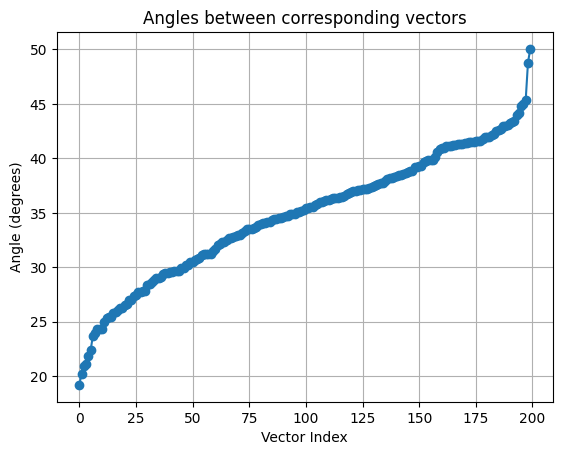

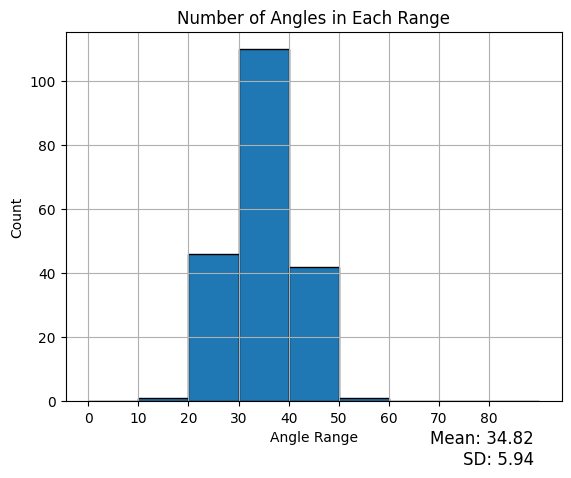

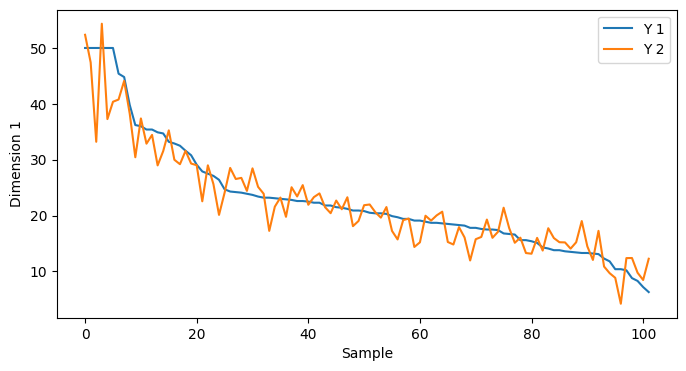

In [27]:
plot_vector_differences([model_nn.weights[0]], [model_sampled.weights[0]])
visualize_data(dataset.y_test, y_sampled)

### Calculate loss vs alpha, radius.

In [28]:
dict_loss_vs_alpha_radius = loss_vs_aslpha_radius(dataset, model_nn)
write_to_file("results/" + dataset_file + "loss_vs_alpha_radius.json", dict_loss_vs_alpha_radius)

radius: 0.000


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 7099.72it/s]


radius: 0.309


100%|██████████| 200/200 [00:00<00:00, 4541.43it/s]


radius: 0.619


100%|██████████| 200/200 [00:00<00:00, 874.43it/s]


radius: 0.928


100%|██████████| 200/200 [00:00<00:00, 272.05it/s]


radius: 1.238


100%|██████████| 200/200 [00:01<00:00, 122.34it/s]


radius: 1.547


100%|██████████| 200/200 [00:02<00:00, 74.46it/s]


radius: 1.856


100%|██████████| 200/200 [00:03<00:00, 50.96it/s]


radius: 2.166


100%|██████████| 200/200 [00:04<00:00, 40.50it/s]


radius: 2.475


100%|██████████| 200/200 [00:05<00:00, 38.53it/s]


radius: 2.784


100%|██████████| 200/200 [00:05<00:00, 35.90it/s]


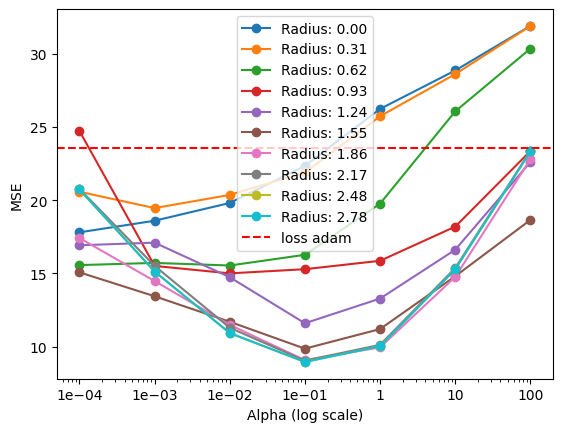

In [29]:
dict_loss_vs_alpha_radius = read_from_file("results/" + dataset_file + "loss_vs_alpha_radius.json")
plot_loss_f_alpha_radius(dict_loss_vs_alpha_radius)